# Applied Statistics - Ian McLoughlin

** Audrey Allen **

## Problem 1 - Lady Tasting Tea

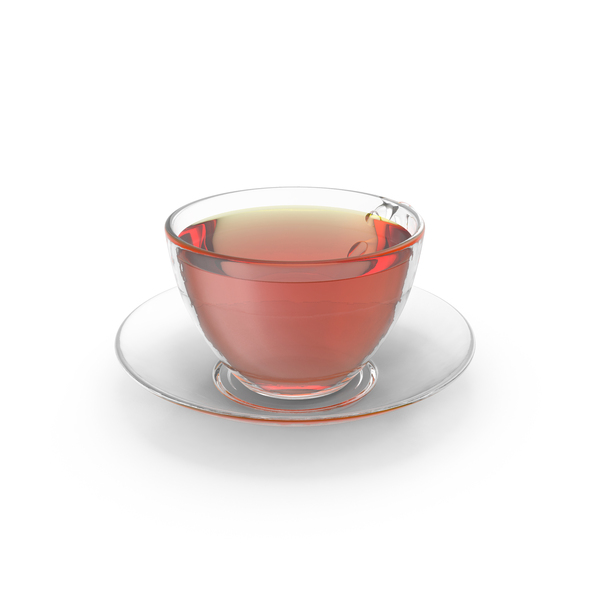

Let's extend the Lady Tasting Tea experiment as follows.
The original experiment has 8 cups: 4 tea-first and 4 milk-first.
Suppose we prepare 12 cups: 8 tea-first and 4 milk-first.
A participant claims they can tell which was poured first.  

Simulate this experiment using `numpy` by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance.
Compare your result with the original 8-cup experiment.  

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.  


# https://jonykoren.medium.com/lady-tasting-tea-e46f89fbe9e8

## Background to the Lady Tasting Tea Experiment 

The story begins when Sir Ronald Aylmer Fisher participated in a tea party where a woman called Muriel Bristol, claimed to be able to tell if a tea was prepared with milk added to the cup first OR with milk added after the tea was poured.

Fisher designed an experiment where the lady was presented with 8 random cups of tea, 4 with milk first, 4 with tea first.

She then tasted each cup and reported which four she thought had milk added first.

Now the question Fisher asked is:

"how do we test whether she is really good at this or if she's just guessing?"

Fisher introduced the idea of a null hypothesis . In the lady tasting tea experiment, the null hypothesis was that the lady could not really tell the difference between teas, and she is just guessing.

Now,the idea of hypothesis testing is to attempt to reject the null hypothesis, or more accurately, to see how much the data collected in the experiment provides evidence that the null hypothesis is FALSE.

The test statistic is a simple count of the number of successes in selecting the 4 out of 8 cups. Moreover, the distribution of possible numbers of successes, assuming the null hypothesis is true, can be computed using the number of combinations.

Explain what I am doing here

Import various libraries required for this task below

In [76]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

Firstly I am going to extract the probability of my modified experiment (12 cups of tea) using the math.comb function as shown in the original Lady tasting tea experiment. 

In [103]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with tea in first.
no_cups_tea_first=8

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

In [104]:
# Number of ways of selecting eight cups from twelve.
ways = math.comb(no_cups, no_cups_tea_first)

# Show.
ways

495

The probability of getting all 12 correct by pure chance is:- 

p=1/495​≈0.0020202020…≈0.00202

In comparison the original Lady Tasting Tea experiment (8 cups: 4 of each) has a p value of 1/70​≈≈0.0142857

So the 12-cup design with 8:4 is much harder to succeed at by chance (about 7× smaller probability).

## Lady Tasting Tea Experiment - Simulation Using Numpy - Explanation

1. Set up the experiment 
    - There are 12 cups of tea in total
    - 8 cups are prepared with tea first, and 4 cups with milk first.  
    - The person identifies the 8 tea-first cups. 

In [117]:
# Here we are going to the use the comb function to calculate he number of ways to choose k items from n items
# without regard to order or repetition

# https://www.codecademy.com/resources/docs/python/math-module/math-comb

import numpy as np
import math

# exact value
# Import comb function
from math import comb
N_total = 12 # This variable details the number of cups in the experiment or total - N Factorial
k_tea = 8   # This variable deails the number of cups with tea in first - K Factorial
exact_count = comb(N_total, k_tea) # 

p_exact = 1 / exact_count # This gives you the probability 'P' value of a perfect guess

print("Total ways to choose: ", exact_count)
print("Exact probability of perfect guess:", p_exact)

Total ways to choose:  495
Exact probability of perfect guess: 0.00202020202020202


### Simulation using Numpy

- Simulate multiple random guesses (with the correct number of tea/milk), shuffle them and compute how often a perfect match 
- Create an array called milktea_array - 8 tea first and 4 milk first
- Shuffle the values in the array multiple times - 1 million  - Can be updated as many times as needed
- For each shuffle compare with the milktea_array values
- Count how many times the shuffled values match the true values
- Estimate the probability of such a match under the null hypothesis - guessing

In [14]:
   # https://numpy.org/doc/2.1/reference/random/generated/numpy.random.permutation.html
   # https://andrewpwheeler.com/2022/03/11/simulating-data-with-numpy-and-scipy/

import numpy as np

# To make sure the results stay the same every time you run the code set random seed before the numpy function
np.random.seed(42)

# Step 1: Define array (8 tea-first, 4 milk-first) - Name of array is milktea_array
milktea_array = np.array(['tea'] * 8 + ['milk'] * 4)

# Step 2: Number of simulations - You can perform as many simulations as you want
n_simulations = 1_000_000
match_count = 0

# Step 3: Run simulations
for _ in range(n_simulations):
        guess = np.random.permutation(milktea_array)
        if np.array_equal(guess, milktea_array):
            match_count += 1

# Step 4: Compute estimated probability under the null hypothesis - guessing
estimated_prob = match_count / n_simulations
print(f"Estimated probability of a perfect match by chance: {estimated_prob:.8f}")

Estimated probability of a perfect match by chance: 0.00203100


## Comparison of my experiment (12 cups) with Fishers original experiment (8 cups)

Both of these experiments test whether a lady could truly tell if the either the milk or the tea was poured first into a cup. This is a famous example of hypothesis testing.

- Null hypothesis (No real ability)
- Alernative hypothesis (She can tell the difference)

If the lady just guesses at random the probability of getting all 4 correct is 1/70 or 0.0143. At 1.4% Fisher concluded with this probability that there would be strong evidence to suggest she could tell the difference.

With the experiment of 12 cups (8 tea first, 4 milk first). 

The probability of choosing the correct 8 tea first  from 12 is 12/8 = 495. The probability if she chooses completely at random is 1/495 or 0.0020 or 0.2%.

The probability of guessing the correct 8 cups in the modified experiment is less than Fishers experiment meaning that the lady has a greater chance of guessing the cups that have tea in it in the original experiment.

It is clear from my line graph below that the more cups in the experiment the less the probability there is of guessing correctly by chance.

## Report and Interpret the estimated probability of the Modified Experiment

If performance is statisically significant then the null hypothesis is rejected in favour for the alternative hypothesis - Meaning the lady can really tell the difference between the types of tea and it isn't just random guessing.

- Both experiments are testing the same principle - Fishers original 8 cup experiment and the modified 12 cup experiment
- The 12 cup modified experiment makes random guessing less likely so if successful it would lean towards the alernative hypothesis that the lady can indeed tell the difference

In statistics the p-value threshold is the cutoff point used to decide whether to reject the null hypothesis in a hypothesis test.

In the extended design (12 cups) the probability of perfectly guessing by chance drops dramatically from 1.4% to 0.2%. This basically means that if the lady guesses all cups that have milk in them first the eveidence against random guessing is even stronger than before.

You can either 
 - Keep a strict threshold (α ≈ 0.002) - Only all correct answers count as eveidence of real ability - all 12 cups must be guessed correctly
 - Relax the threshold (α = 0.05) - Allow 11 or 10 out of the 12 to count as strong evidence

https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Table_of_error_types

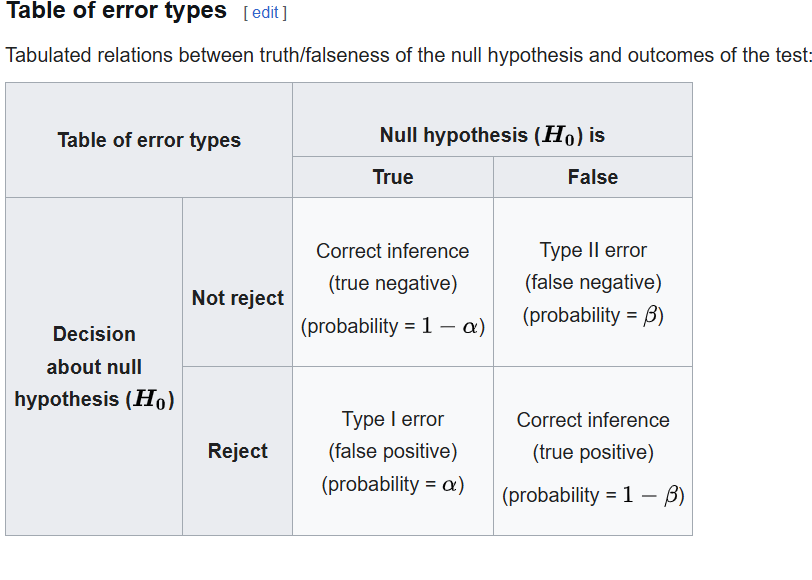

In terms of false positives and false negatives, a positive result corresponds to rejecting the null hypothesis, while a negative result corresponds to failing to reject the null hypothesis; "false" means the conclusion drawn is incorrect. Thus, a type I error is equivalent to a false positive, and a type II error is equivalent to a false negative.

A perfect test would have zero false positives and zero false negatives but in the world of statistics and real data we know this is not the case.

- Type 1 error rate - False Positive-  Is the probability of rejecting the null hypothesis given it is true - Probability of a type 1 error is shown by the symbol α (Alpha) - Usually the significance level is set to 0.05 (5%) - acceptable to have a 5% probability of incorrectly rejeecting the null hypothesis.

- Type 2 error rate - False Negative - Is the probability of failing to reject the null hypothesis even though the alernative hypothesis is true - You conclude there is no evidence when there is one - The probability of a type 2 error is shown by the symbol β (beta).

Usually decreasing one error type increases the other. What we really need to achieve in statisical hypothesis testing is to stabilise as much as possible and mininmise the probability as much as we can of producing false positives and negatives.

- Two options 

Option 1

Reject null hypothesis if the lady guesses > 10 cups correctly. 

Option 2

Only reject null hypothesis if the lady guesses the 12 cups correctly. As calculated previously this is a probability of 𝛼 ≈ 0.0020 α≈0.0020 (about 0.2%) - Very strict conditions

If you go with option 2 which is reject the null hypothesis only if the lady guesses all 12 cups correctly (8 tea first/4 milk first) this is far stricter than Fishers original experiment for his 8 cup perfect score which was 0.014. This means few false positives (Type 1 error) but maybe increasing the likelihood of type 2 error.

## Conclusion - Interpretation and p value threshold discussion

In the original design a perfect p classification yields p = 1.43. In the extended design a perfect classifcation yields p = 0.20% (7 times more evidence against chance). I think because my modified experiment makes a perfect score less likely under the null I would not relax my p value. If anything I would tighten the threshold and still reject on a perfect classification in the 12 cup design.

In short a perfect identification in the 12 cup design is very compelling (0.2%) so I would not relax my p threshold.

The graph below details (using numpy) that as the number of cups increase in the experiment the less the probability is that that the lady has chosen the cups by pure chance. The percentage probability goes from 0.2020% (12 cups) to 0.0008% (20 cups) so if the lady correctly guesses the 20 cups correctly then the null hypothesis is rejected and the alternative hypothesis that she does have ability to tell the difference is strongly supported here. 

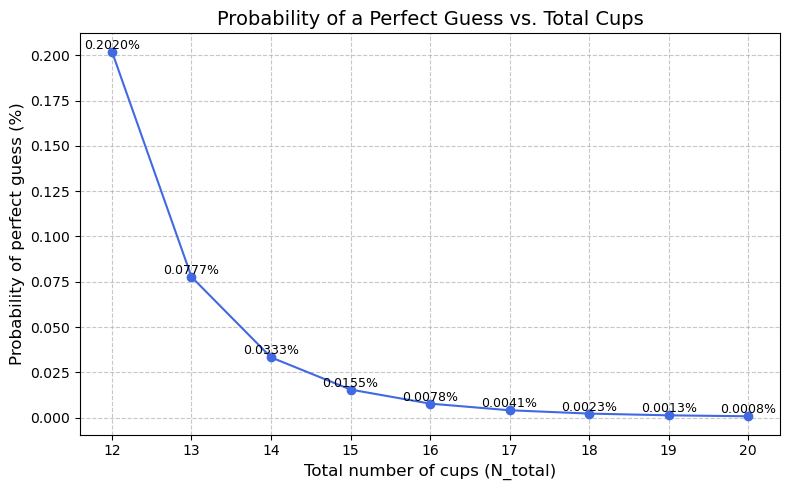

In [15]:
# https://chatgpt.com/share/68f11265-8a68-8012-9b46-84dbe72c2aa5

import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parameters
k_tea = 8  # number of tea-first cups
N_values = np.arange(12, 21)  # total cups: 8 to 20
p_exact = [1 / comb(N, k_tea) if N >= k_tea else np.nan for N in N_values]

# Convert to percentages for readability
p_percent = [p * 100 for p in p_exact]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(N_values, p_percent, marker='o', linestyle='-', color='royalblue')

# Add readable percentage labels above each point
for N, p in zip(N_values, p_percent):
    plt.text(N, p, f"{p:.4f}%", ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Probability of a Perfect Guess vs. Total Cups", fontsize=14)
plt.xlabel("Total number of cups (N_total)", fontsize=12)
plt.ylabel("Probability of perfect guess (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

*** 

## End Problem 1

References Task 2



## Problem 2 - Normal Distribution



*** 

## End Problem 2

References Task 2


## Problem 3 



## End Problem 3

Problem 3 - References



## Problem 4




## End Problem 4

Problem 4 - References



## Problem 5



## End Problem 5

Problem 5 - References

